In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from sklearn import datasets
from sklearn import metrics


In [7]:
iris=datasets.load_iris()

In [9]:
df=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names'] +['target'])

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
df['target'].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [15]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


<AxesSubplot:>

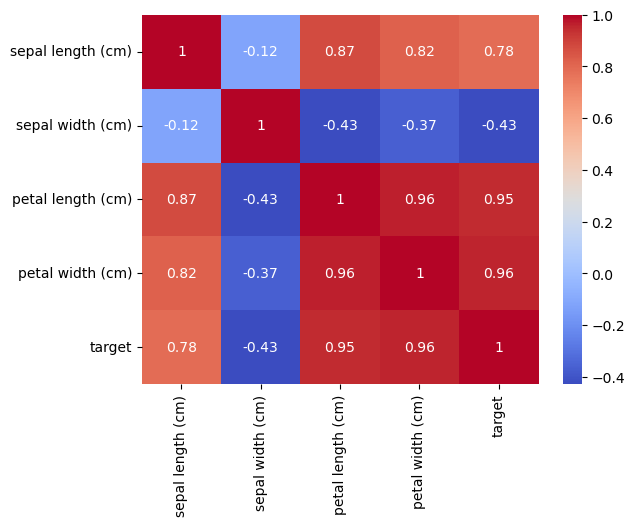

In [53]:
# Correlation Heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")


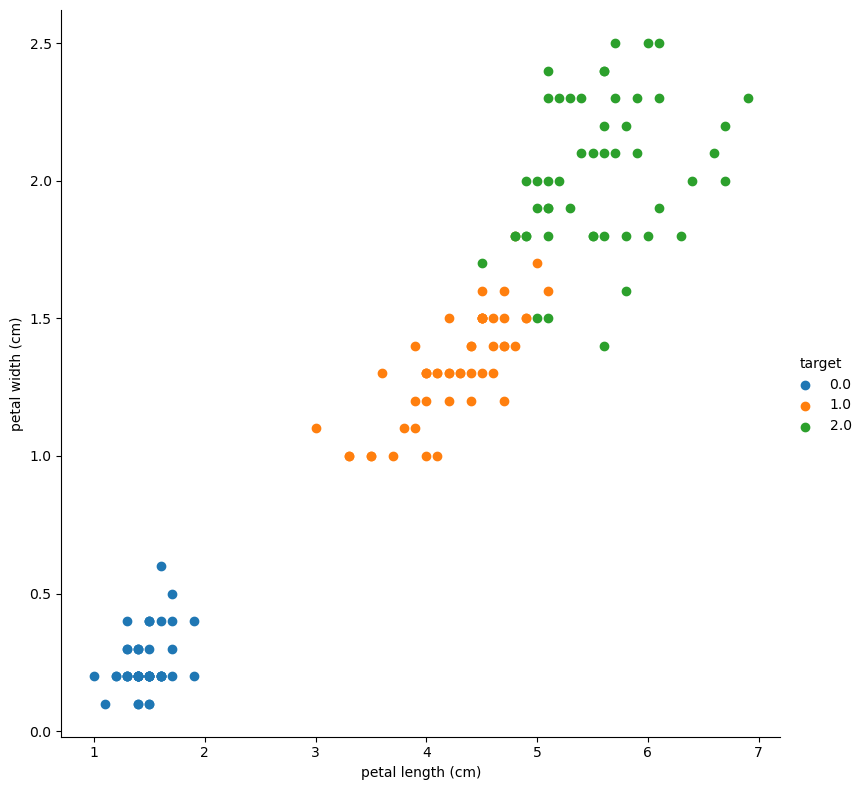

In [13]:
sns.FacetGrid(df,hue='target',height=8).map(plt.scatter,"petal length (cm)","petal width (cm)").add_legend()

## fit a SVM model


In [27]:
from sklearn import svm

model = svm.SVC(kernel='linear', C=0.1)



In [28]:
model.fit(iris.data,iris.target)

SVC(C=0.1, kernel='linear')

In [29]:
model.score(iris.data,iris.target)

0.9666666666666667

## make prediction

In [34]:
X=iris.target
y=model.predict(iris.data)

In [35]:
from  sklearn import metrics

In [36]:
print(metrics.classification_report(X,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.96      0.95        50
           2       0.96      0.94      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [56]:
conf_matrix=(metrics.confusion_matrix(X,y))

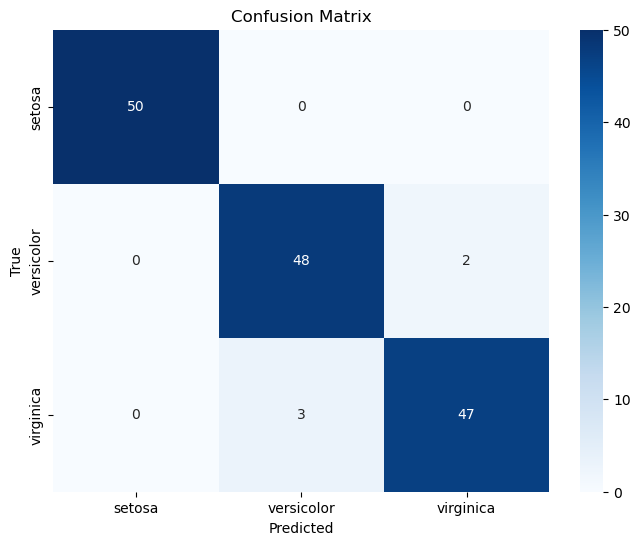

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

##Hypertunning  

In [38]:
## we only take two features now

X_data=iris.data[:,:2]
y_data=iris.target

In [49]:
def SVMClassifier(my_kernel,my_C,my_gamma):
    svc=svm.SVC(kernel=my_kernel,C=my_C,gamma=my_gamma)
    svc.fit(X_data,y_data)
    h=0.02
    x_min,x_max=X_data[:,0].min() -1,X_data[:,0].max() + 1
    y_min,y_max=X_data[:,1].min() -1,X_data[:,1].max() + 1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    
    plt.subplot(1,1,1)
    z=svc.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap=plt.cm.Paired,alpha=0.8)
    plt.scatter(X_data[:,0],X_data[:,1],c=y)
    plt.xlabel('sepal_length')
    plt.ylabel('sepal_width')
    plt.xlim(xx.min(),xx.max())
    plt.show()
    

In [50]:
from ipywidgets import interact

In [51]:
i=interact(SVMClassifier,my_kernel=['linear','rbf'],my_C=(0.001,10),my_gamma=(1,100))

interactive(children=(Dropdown(description='my_kernel', options=('linear', 'rbf'), value='linear'), FloatSlide…